In [1]:
pip install tensorflow

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [10]:
model = models.Sequential()


In [11]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [13]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [14]:
model.add(layers.Flatten())

In [15]:
model.add(layers.Dense(64, activation='relu'))


In [16]:
model.add(layers.Dense(10, activation='softmax'))


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3665 - loss: 1.7289 - val_accuracy: 0.5839 - val_loss: 1.1822
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5890 - loss: 1.1663 - val_accuracy: 0.6275 - val_loss: 1.0626
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6474 - loss: 0.9961 - val_accuracy: 0.6638 - val_loss: 0.9598
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6872 - loss: 0.8938 - val_accuracy: 0.6776 - val_loss: 0.9380
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7109 - loss: 0.8215 - val_accuracy: 0.6932 - val_loss: 0.8805
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7388 - loss: 0.7484 - val_accuracy: 0.6931 - val_loss: 0.8889
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7520 - loss: 0.7076 - val_accuracy: 0.7039 - val_loss: 0.8662
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7717 - loss: 0.6546 

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.7158 - loss: 0.8662
Test accuracy: 0.7158


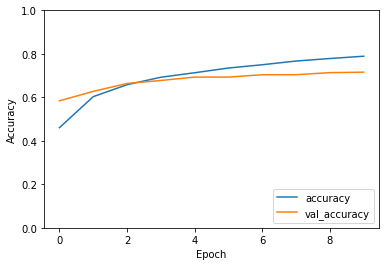

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [21]:
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, Predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show().